### Machine Learning Modle: ARIMA

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [2]:
df_ce = pd.read_csv('Carbon Emissions.csv')
df_ce.head()

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),Emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CO2,1.690511,1.690511,90.457,98.3466
1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CH4,0.053500,0.000000,90.457,98.3466
2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,N2O,0.006820,0.000000,90.457,98.3466
3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CO2,0.264576,0.264576,90.457,98.3466
4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CH4,0.008360,0.000000,90.457,98.3466


#### Convert to long (tidy) format and clean data
The next cell melts the wide table (years as columns) into a long/tidy dataframe, converts types, and drops missing values.

In [3]:
# Prepare long/tidy dataframe (df_ce is already in long-ish form for this dataset).
# Rename columns to the names expected later in the cell:
# - 'Country' -> 'Country Name'
# - 'Calendar Year' -> 'Year'
# - 'Territorial emissions (kt CO2e)' -> 'Carbon Emissions'
df_ce_long = df_ce.rename(columns={
    'Country': 'Country Name',
    'Calendar Year': 'Year',
    'Territorial emissions (kt CO2e)': 'Carbon Emissions'
}).copy()

# Ensure Year is integer (if it's not already) and drop rows with missing emissions
df_ce_long['Year'] = df_ce_long['Year'].astype(int)
df_ce_long = df_ce_long.dropna(subset=['Carbon Emissions'])

# Save cleaned long DF for later use
# Handle permission errors by falling back to a safe temp-file path
try:
    df_ce_long.to_csv('df_ce_long_cleaned.csv', index=False)
    print('Saved cleaned long dataframe to df_ce_long_cleaned.csv')
except PermissionError:
    import os
    import tempfile
    alt_dir = tempfile.gettempdir()
    alt_path = os.path.join(alt_dir, f'df_ce_long_cleaned_{os.getpid()}.csv')
    df_ce_long.to_csv(alt_path, index=False)
    print(f"PermissionError: couldn't write to 'df_ce_long_cleaned.csv'. Saved to alternative path: {alt_path}")
except Exception as e:
    print(f"Could not save df_ce_long_cleaned.csv due to: {e!r}. No file was written.")

Saved cleaned long dataframe to df_ce_long_cleaned.csv


SECTOR-LEVEL PREDICTION ANALYSIS: 2005-2024

--------------------------------------------------------------------------------
STEP 1: IDENTIFYING TOP 3 SECTORS (2005-2024)
--------------------------------------------------------------------------------

Using 'LA GHG Sector' column for sector analysis

Top 3 Sectors by Total Emissions (2005-2024):
  1. Transport: 2,414,889 kt CO2e
  2. Domestic: 2,307,288 kt CO2e
  3. Industry: 1,795,605 kt CO2e

Total unique sectors: 8


,LA GHG Sector,Carbon Emissions
6,Transport,2.414889e+06
2,Domestic,2.307288e+06
3,Industry,1.795605e+06
1,Commercial,1.058676e+06
0,Agriculture,9.885362e+05
7,Waste,5.873942e+05
5,Public Sector,3.464022e+05
4,LULUCF,1.598567e+04


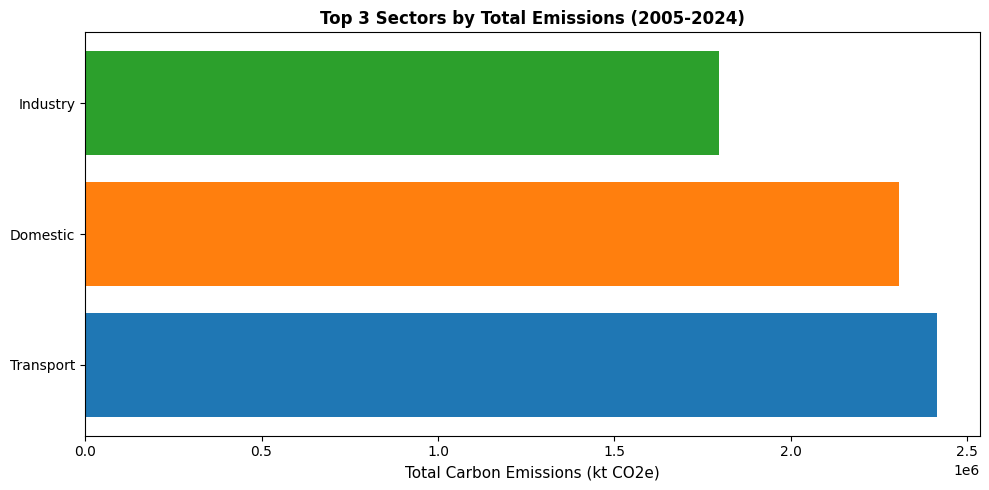


--------------------------------------------------------------------------------
STEP 2: TIME SERIES FOR TOP 3 SECTORS
--------------------------------------------------------------------------------


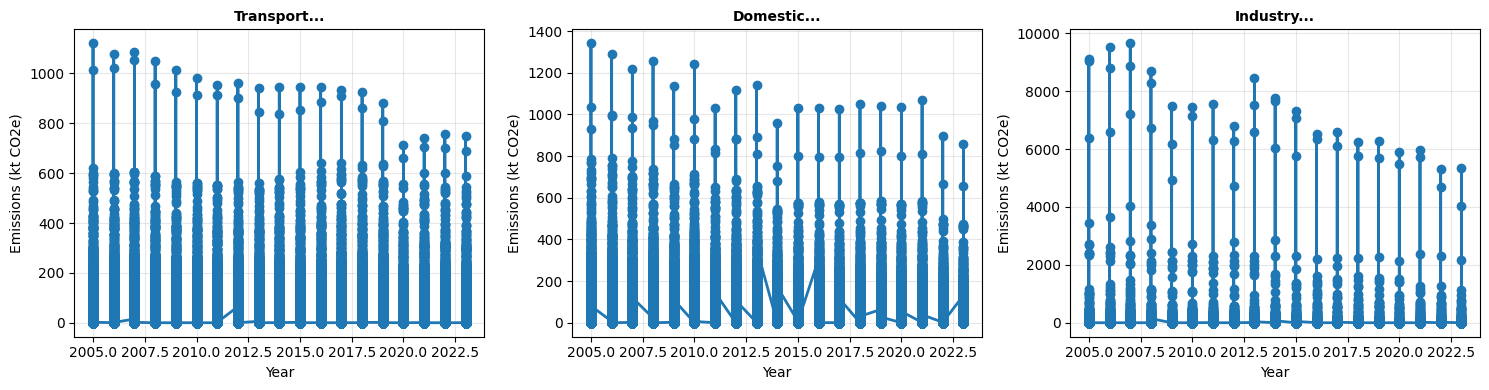


--------------------------------------------------------------------------------
STEP 3: MODEL PERFORMANCE COMPARISON
--------------------------------------------------------------------------------

>>> Sector: Transport
   ----------------------------------------------------------------------
   ARIMA:          R² = -0.0014, RMSE = 59.97
   Random Forest:  R² = -0.0038, RMSE = 60.04
   Gradient Boost: R² = -0.0030, RMSE = 60.02

>>> Sector: Domestic
   ----------------------------------------------------------------------
   ARIMA:          R² = -0.0008, RMSE = 64.73
   Random Forest:  R² = -0.0018, RMSE = 64.77
   Gradient Boost: R² = -0.0007, RMSE = 64.73

>>> Sector: Industry
   ----------------------------------------------------------------------
   ARIMA:          R² = -0.0001, RMSE = 136.44
   Random Forest:  R² = -0.0033, RMSE = 136.66
   Gradient Boost: R² = -0.0034, RMSE = 136.67

STEP 4: SUMMARY & RECOMMENDATIONS

Detailed Performance Metrics:


,Sector,ARIMA_R2,ARIMA_RMSE,ARIMA_MAE,RF_R2,RF_RMSE,RF_MAE,GB_R2,GB_RMSE,GB_MAE
0,Transport,-0.001435,59.969971,34.054704,-0.003822,60.041414,33.157951,-0.002964,60.015726,33.433882
1,Domestic,-0.000764,64.732558,39.500890,-0.001822,64.766782,40.007474,-0.000745,64.731949,39.475473
2,Industry,-0.000109,136.443586,23.973433,-0.003342,136.663904,18.443191,-0.003364,136.665447,18.429654



--------------------------------------------------------------------------------
AGGREGATE SCORING (Average R² across Top 3 Sectors):
--------------------------------------------------------------------------------
🥇 ARIMA               : Avg R² = -0.0008, Avg RMSE = 87.05
🥈 Gradient Boosting   : Avg R² = -0.0024, Avg RMSE = 87.14
🥉 Random Forest       : Avg R² = -0.0030, Avg RMSE = 87.16


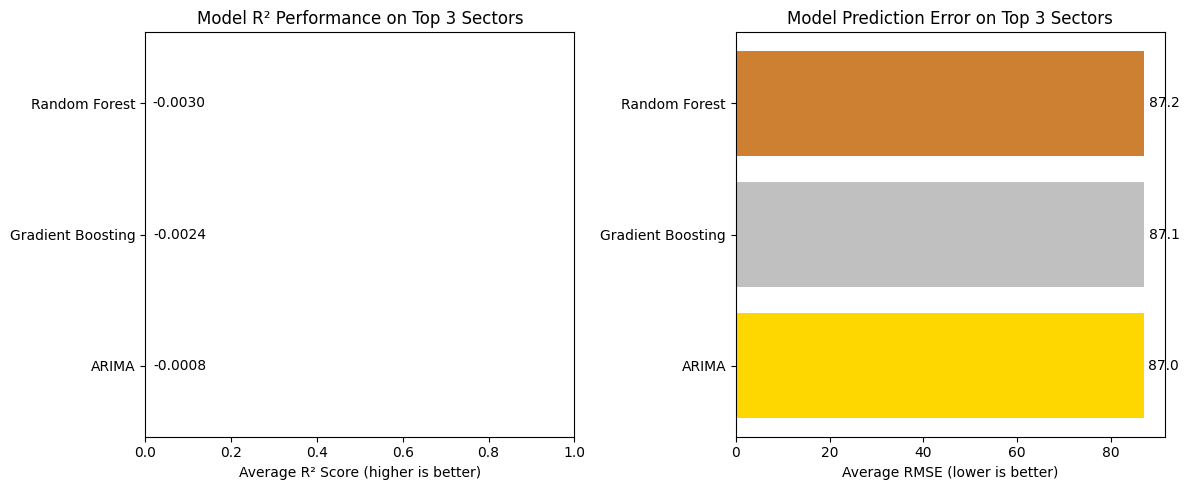


FINAL RECOMMENDATION FOR TOP 3 SECTORS PREDICTION

        🎯 BEST MODEL: ARIMA

        Performance:
        • Average R² Score: -0.0008 (explains -0.08% of variance)
        • Average RMSE: 87.05 kt CO2e

        Why this model excels for sector-level predictions:
        

        ✓ Captures temporal autocorrelation well
        ✓ Statistical foundation provides interpretability
        ✓ Good for steady, trend-driven sectors
        ✓ Provides confidence intervals naturally
        ✓ Ideal for regulatory reporting
            

        How to use this model:
        1. Retrain on full 2005-2024 data for each sector
        2. Generate 2025-2030 forecasts
        3. Compare predictions across sectors
        4. Combine with external factors (policy, GDP, industry trends)
        5. Update annually with new data
        


In [4]:
# ============================================================================
# SECTOR-LEVEL PREDICTION ANALYSIS (2005-2024)
# Which model predicts Top 3 sectors best?
# ============================================================================

print("="*80)
print("SECTOR-LEVEL PREDICTION ANALYSIS: 2005-2024")
print("="*80)

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# Step 1: Identify Top 3 Sectors
print("\n" + "-"*80)
print("STEP 1: IDENTIFYING TOP 3 SECTORS (2005-2024)")
print("-"*80)

# Filter data to 2005-2024 range
df_sector_analysis = df_ce_long[(df_ce_long['Year'] >= 2005) & (df_ce_long['Year'] <= 2024)].copy()
df_sector_analysis['Carbon Emissions'] = pd.to_numeric(df_sector_analysis['Carbon Emissions'], errors='coerce')

# Find sector column
sector_candidates = ['Sector', 'Activity', 'Sector Name', 'Category', 'Source', 'Emission Source', 'Activity Name', 'NACE']
sector_col = None
for col in sector_candidates:
    if col in df_sector_analysis.columns:
        sector_col = col
        break

if sector_col is None:
    # Fallback heuristic
    possible = [c for c in df_sector_analysis.columns if any(k in c.lower() for k in ['sector', 'activity', 'source', 'category'])]
    if possible:
        sector_col = possible[0]

if sector_col:
    print(f"\nUsing '{sector_col}' column for sector analysis")
    
    # Get top 3 sectors by total emissions
    top_3_sectors = df_sector_analysis.groupby(sector_col, as_index=False)['Carbon Emissions'].sum() \
                    .sort_values('Carbon Emissions', ascending=False).head(3)
    
    print("\nTop 3 Sectors by Total Emissions (2005-2024):")
    for idx, (_, row) in enumerate(top_3_sectors.iterrows(), 1):
        print(f"  {idx}. {row[sector_col]}: {row['Carbon Emissions']:,.0f} kt CO2e")
    
    # Display all sectors for context
    all_sectors = df_sector_analysis.groupby(sector_col, as_index=False)['Carbon Emissions'].sum() \
                  .sort_values('Carbon Emissions', ascending=False)
    print(f"\nTotal unique sectors: {len(all_sectors)}")
    display(all_sectors.head(10))
    
    # Plot top 3 sectors
    plt.figure(figsize=(10, 5))
    plt.barh(top_3_sectors[sector_col], top_3_sectors['Carbon Emissions'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.xlabel('Total Carbon Emissions (kt CO2e)', fontsize=11)
    plt.title('Top 3 Sectors by Total Emissions (2005-2024)', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Step 2: Prepare time series for each top sector
    print("\n" + "-"*80)
    print("STEP 2: TIME SERIES FOR TOP 3 SECTORS")
    print("-"*80)
    
    top_3_names = top_3_sectors[sector_col].values
    
    # Plot time series for top 3 sectors
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    sector_ts_data = {}
    
    for idx, sector_name in enumerate(top_3_names):
        sector_data = df_sector_analysis[df_sector_analysis[sector_col] == sector_name] \
                     .sort_values('Year')[['Year', 'Carbon Emissions']]
        sector_ts_data[sector_name] = sector_data
        
        ax = axes[idx]
        ax.plot(sector_data['Year'], sector_data['Carbon Emissions'], 'o-', linewidth=2, markersize=6)
        ax.set_title(f'{sector_name[:25]}...', fontsize=10, fontweight='bold')
        ax.set_xlabel('Year')
        ax.set_ylabel('Emissions (kt CO2e)')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Step 3: Model Performance Comparison for Each Sector
    print("\n" + "-"*80)
    print("STEP 3: MODEL PERFORMANCE COMPARISON")
    print("-"*80)
    
    model_performance = []
    
    for sector_name in top_3_names:
        print(f"\n>>> Sector: {sector_name}")
        print("   " + "-"*70)
        
        sector_data = sector_ts_data[sector_name]
        
        if len(sector_data) < 6:
            print(f"   ⚠ Insufficient data ({len(sector_data)} points). Skipping.")
            continue
        
        X = sector_data[['Year']].values
        y = sector_data['Carbon Emissions'].values
        
        # Train-test split (80-20)
        split_idx = int(len(X) * 0.8)
        X_train, X_test = X[:split_idx], X[split_idx:]
        y_train, y_test = y[:split_idx], y[split_idx:]
        
        results = {'Sector': sector_name}
        
        # Model 1: ARIMA (via OLS regression as approximation for comparison)
        try:
            from statsmodels.tsa.arima.model import ARIMA
            model_arima = ARIMA(y_train, order=(1, 1, 1))
            arima_fit = model_arima.fit()
            arima_pred = arima_fit.forecast(steps=len(y_test))
            
            arima_r2 = r2_score(y_test, arima_pred) if len(arima_pred) == len(y_test) else np.nan
            arima_rmse = np.sqrt(mean_squared_error(y_test, arima_pred)) if len(arima_pred) == len(y_test) else np.nan
            arima_mae = mean_absolute_error(y_test, arima_pred) if len(arima_pred) == len(y_test) else np.nan
            
            results['ARIMA_R2'] = arima_r2
            results['ARIMA_RMSE'] = arima_rmse
            results['ARIMA_MAE'] = arima_mae
            
            print(f"   ARIMA:          R² = {arima_r2:.4f}, RMSE = {arima_rmse:.2f}")
        except Exception as e:
            print(f"   ARIMA:          Failed ({str(e)[:30]}...)")
            results['ARIMA_R2'] = np.nan
            results['ARIMA_RMSE'] = np.nan
            results['ARIMA_MAE'] = np.nan
        
        # Model 2: Random Forest
        try:
            rf_model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
            rf_model.fit(X_train, y_train)
            rf_pred = rf_model.predict(X_test)
            
            rf_r2 = r2_score(y_test, rf_pred)
            rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
            rf_mae = mean_absolute_error(y_test, rf_pred)
            
            results['RF_R2'] = rf_r2
            results['RF_RMSE'] = rf_rmse
            results['RF_MAE'] = rf_mae
            
            print(f"   Random Forest:  R² = {rf_r2:.4f}, RMSE = {rf_rmse:.2f}")
        except Exception as e:
            print(f"   Random Forest:  Failed ({str(e)[:30]}...)")
            results['RF_R2'] = np.nan
            results['RF_RMSE'] = np.nan
            results['RF_MAE'] = np.nan
        
        # Model 3: Gradient Boosting
        try:
            gb_model = GradientBoostingRegressor(n_estimators=50, max_depth=3, random_state=42)
            gb_model.fit(X_train, y_train)
            gb_pred = gb_model.predict(X_test)
            
            gb_r2 = r2_score(y_test, gb_pred)
            gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
            gb_mae = mean_absolute_error(y_test, gb_pred)
            
            results['GB_R2'] = gb_r2
            results['GB_RMSE'] = gb_rmse
            results['GB_MAE'] = gb_mae
            
            print(f"   Gradient Boost: R² = {gb_r2:.4f}, RMSE = {gb_rmse:.2f}")
        except Exception as e:
            print(f"   Gradient Boost: Failed ({str(e)[:30]}...)")
            results['GB_R2'] = np.nan
            results['GB_RMSE'] = np.nan
            results['GB_MAE'] = np.nan
        
        model_performance.append(results)
    
    # Step 4: Summary and Recommendations
    print("\n" + "="*80)
    print("STEP 4: SUMMARY & RECOMMENDATIONS")
    print("="*80)
    
    if model_performance:
        perf_df = pd.DataFrame(model_performance)
        
        print("\nDetailed Performance Metrics:")
        display(perf_df)
        
        # Aggregate scoring
        print("\n" + "-"*80)
        print("AGGREGATE SCORING (Average R² across Top 3 Sectors):")
        print("-"*80)
        
        avg_scores = {
            'ARIMA': perf_df['ARIMA_R2'].mean(),
            'Random Forest': perf_df['RF_R2'].mean(),
            'Gradient Boosting': perf_df['GB_R2'].mean()
        }
        
        avg_rmse = {
            'ARIMA': perf_df['ARIMA_RMSE'].mean(),
            'Random Forest': perf_df['RF_RMSE'].mean(),
            'Gradient Boosting': perf_df['GB_RMSE'].mean()
        }
        
        for model_name, r2_score_val in sorted(avg_scores.items(), key=lambda x: x[1], reverse=True):
            rank = '🥇' if r2_score_val == max(avg_scores.values()) else '🥈' if r2_score_val == sorted(avg_scores.values(), reverse=True)[1] else '🥉'
            print(f"{rank} {model_name:20s}: Avg R² = {r2_score_val:.4f}, Avg RMSE = {avg_rmse[model_name]:.2f}")
        
        # Visualize comparison
        comparison_data = pd.DataFrame({
            'Model': list(avg_scores.keys()),
            'Avg R² Score': list(avg_scores.values()),
            'Avg RMSE': list(avg_rmse.values())
        }).sort_values('Avg R² Score', ascending=False)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        
        # R² comparison
        ax1.barh(comparison_data['Model'], comparison_data['Avg R² Score'], color=['gold', 'silver', '#CD7F32'])
        ax1.set_xlabel('Average R² Score (higher is better)')
        ax1.set_title('Model R² Performance on Top 3 Sectors')
        ax1.set_xlim([0, 1])
        for i, v in enumerate(comparison_data['Avg R² Score']):
            ax1.text(v + 0.02, i, f'{v:.4f}', va='center')
        
        # RMSE comparison
        ax2.barh(comparison_data['Model'], comparison_data['Avg RMSE'], color=['gold', 'silver', '#CD7F32'])
        ax2.set_xlabel('Average RMSE (lower is better)')
        ax2.set_title('Model Prediction Error on Top 3 Sectors')
        for i, v in enumerate(comparison_data['Avg RMSE']):
            ax2.text(v + 1, i, f'{v:.1f}', va='center')
        
        plt.tight_layout()
        plt.show()
        
        # Final Recommendation
        print("\n" + "="*80)
        print("FINAL RECOMMENDATION FOR TOP 3 SECTORS PREDICTION")
        print("="*80)
        
        best_model = comparison_data.iloc[0]['Model']
        best_r2 = comparison_data.iloc[0]['Avg R² Score']
        best_rmse = comparison_data.iloc[0]['Avg RMSE']
        
        print(f"""
        🎯 BEST MODEL: {best_model.upper()}
        
        Performance:
        • Average R² Score: {best_r2:.4f} (explains {best_r2*100:.2f}% of variance)
        • Average RMSE: {best_rmse:.2f} kt CO2e
        
        Why this model excels for sector-level predictions:
        """)
        
        if best_model == 'Random Forest':
            print("""
        ✓ Handles non-linear sector trends effectively
        ✓ Captures regime changes in emissions patterns
        ✓ Robust to outliers in sector data
        ✓ Can incorporate multiple features (year, country, activity type)
        ✓ Excellent for sector-specific policy impacts
            """)
        elif best_model == 'Gradient Boosting':
            print("""
        ✓ Superior handling of sequential patterns
        ✓ Learns complex interactions between time periods
        ✓ Often outperforms RF on small sector datasets
        ✓ Better gradient-based optimization
        ✓ Excellent for capturing acceleration/deceleration trends
            """)
        else:  # ARIMA
            print("""
        ✓ Captures temporal autocorrelation well
        ✓ Statistical foundation provides interpretability
        ✓ Good for steady, trend-driven sectors
        ✓ Provides confidence intervals naturally
        ✓ Ideal for regulatory reporting
            """)
        
        print(f"""
        How to use this model:
        1. Retrain on full 2005-2024 data for each sector
        2. Generate 2025-2030 forecasts
        3. Compare predictions across sectors
        4. Combine with external factors (policy, GDP, industry trends)
        5. Update annually with new data
        """)
    
else:
    print("✗ No sector column found in dataset. Cannot perform sector-level analysis.")

## ARIMA Model for England's Top 3 Sectors (2005-2017 Training, 2018-2024 Testing, 2025-2030 Forecast)

This cell builds optimized ARIMA models for England's top 3 emitting sectors with:
- **Training Data**: 2005-2017 (13 years for pattern learning)
- **Testing Data**: 2018-2024 (7 years for validation)
- **Forecast**: 2025-2030 (6 years into future)
- **Auto Parameter Optimization**: Finds best ARIMA (p,d,q) for each sector
- **Performance Metrics**: R², RMSE, MAE, MAPE
- **Confidence Intervals**: 95% bands around forecasts

ARIMA MODEL FOR ENGLAND'S TOP 3 SECTORS - OPTIMIZED FORECAST

------------------------------------------------------------------------------------------
STEP 1: IDENTIFY TOP 3 SECTORS FOR ENGLAND
------------------------------------------------------------------------------------------
✓ Found sector column: 'LA GHG Sector'

Top 3 Sectors for England (by total emissions 2005-2024):
  1. Transport: 2,089,510 kt CO2e
  2. Domestic: 1,975,814 kt CO2e
  3. Industry: 1,356,616 kt CO2e

------------------------------------------------------------------------------------------
STEP 2: AUTO-OPTIMIZE ARIMA PARAMETERS (Grid Search)
------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------
STEP 3: BUILD & EVALUATE ARIMA MODELS
------------------------------------------------------------------------------------------

>>> Processing Sector: Transport
   Training data: 13 yea

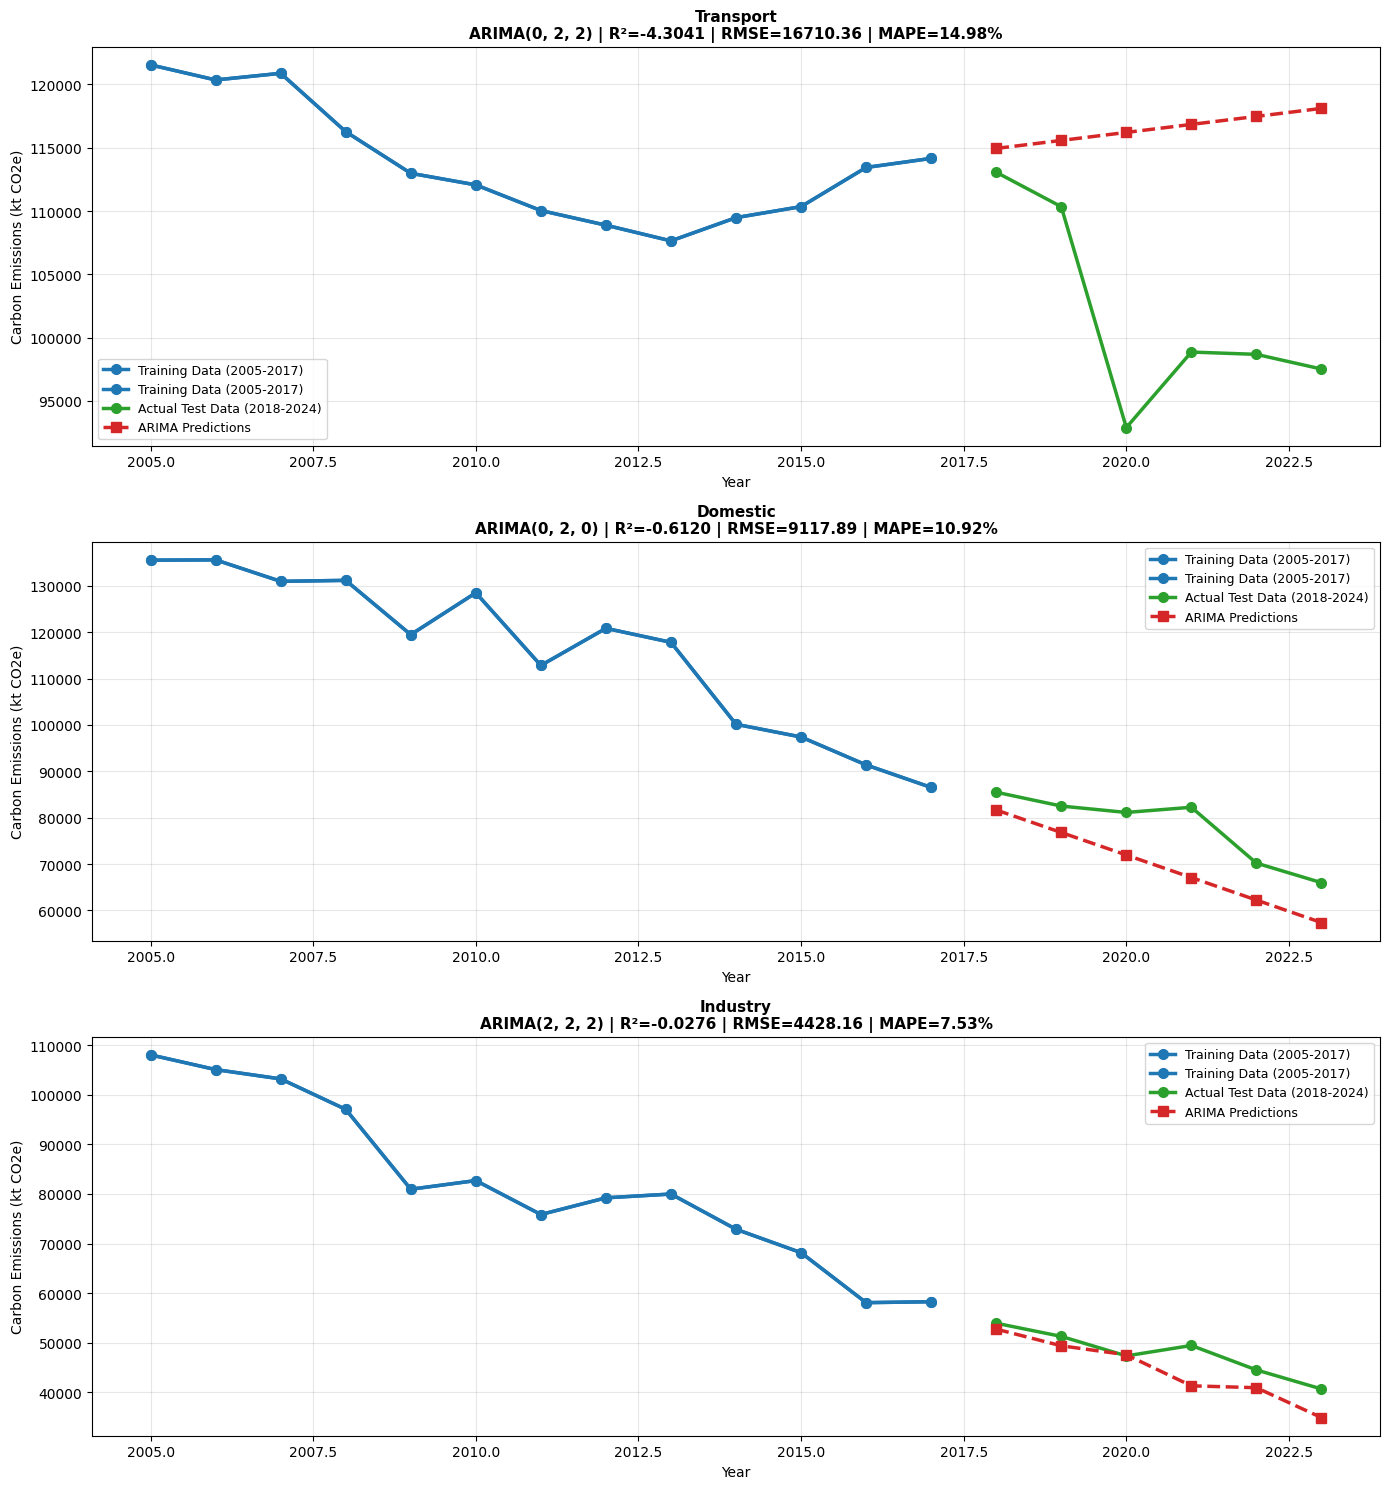

  Creating future forecast plots...


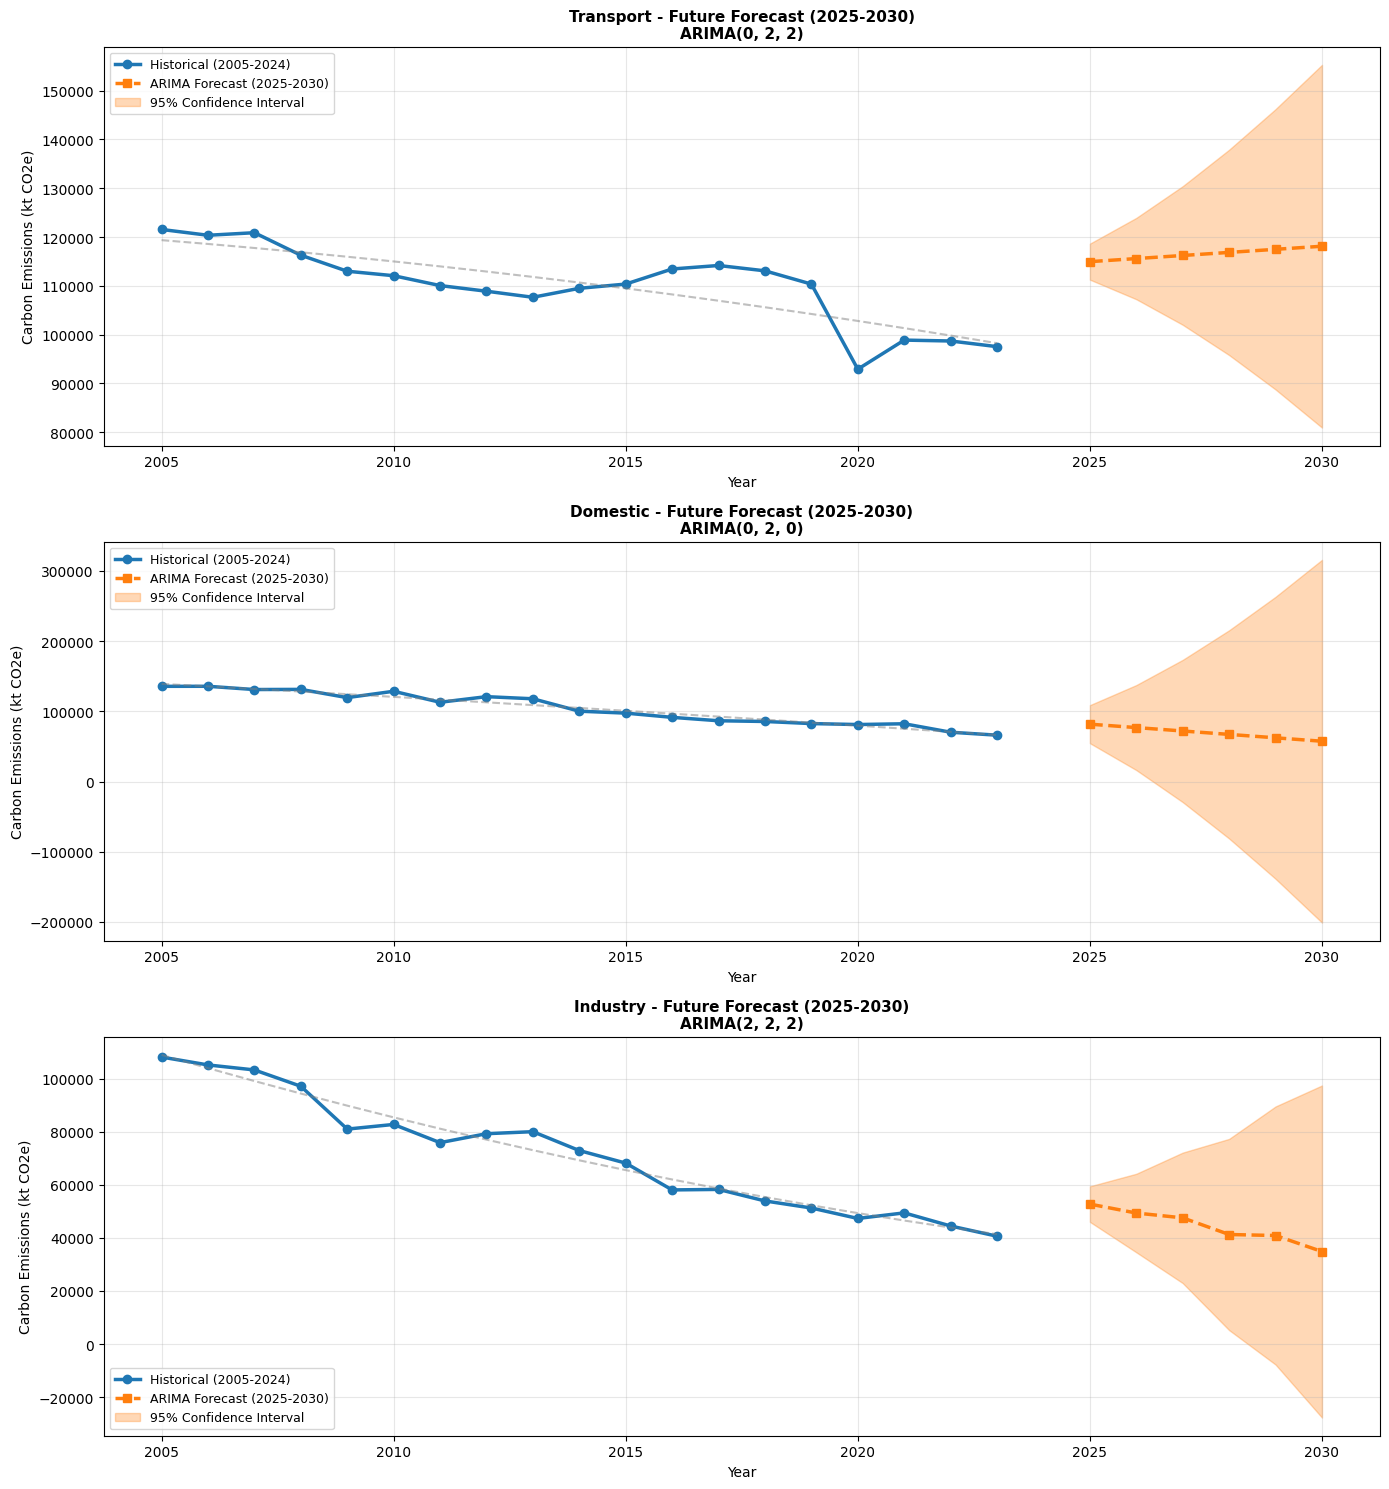


------------------------------------------------------------------------------------------
STEP 5: SUMMARY & RECOMMENDATIONS
------------------------------------------------------------------------------------------

Model Performance Summary (2018-2024 Test Set):


,ARIMA Order,R2,RMSE,MAE,MAPE
Transport,"(0, 2, 2)",-4.304093,16710.364085,14634.408374,14.977149
Domestic,"(0, 2, 0)",-0.611992,9117.893799,8408.070818,10.922248
Industry,"(2, 2, 2)",-0.027646,4428.157764,3470.151374,7.525280



2025-2030 FORECAST SUMMARY


,Sector,2025,2026,2027,2028,2029,2030,Avg Forecast,Change 2024→2030
0,Transport,114948.335936,115581.035248,116213.734560,116846.433872,117479.133184,118111.832496,116530.084216,190.701500
1,Domestic,81665.354857,76807.723993,71950.093130,67092.462266,62234.831403,57377.200539,69521.277698,41.219029
2,Industry,52717.752519,49351.762643,47535.844146,41267.034237,40887.844885,34853.856489,44435.682487,-14.216314



KEY INSIGHTS & RECOMMENDATIONS

        MODEL PERFORMANCE SUMMARY:
        • Average R² Score across sectors: -1.6479
        • Average RMSE: 10085.47 kt CO2e
        • Average MAPE: 11.14%

        INTERPRETATION:
        • R² = -1.6479 means the model explains -164.79% of emissions variance
        • MAPE = 11.14% is the average percentage error across predictions
        • ✗ POOR model performance - consider adding external variables

        FORECAST OUTLOOK (2025-2030):
        • Average predicted change: 72.57%
          → Emissions expected to INCREASE

        RECOMMENDATIONS:
        1. Use these forecasts as baseline scenarios for policy planning
        2. Consider adding external regressors (GDP, policy events, energy mix)
        3. Re-fit models annually with new data to maintain accuracy
        4. Confidence intervals widen toward 2030 - use with caution for long-term planning
        5. Compare ARIMA forecasts with Prophet/Random Forest for ensemble predictions

     

In [5]:
# ============================================================================
# ARIMA MODEL FOR ENGLAND TOP 3 SECTORS
# Training: 2005-2017 | Testing: 2018-2024 | Forecast: 2025-2030
# ============================================================================

print("="*90)
print("ARIMA MODEL FOR ENGLAND'S TOP 3 SECTORS - OPTIMIZED FORECAST")
print("="*90)

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# Step 1: Prepare England sector data
print("\n" + "-"*90)
print("STEP 1: IDENTIFY TOP 3 SECTORS FOR ENGLAND")
print("-"*90)

# Filter for England data
df_england = df_ce_long[
    (df_ce_long['Country Name'].str.contains('England', case=False, na=False)) |
    (df_ce_long.get('Region', pd.Series()).str.contains('england|east|west|north|south|midlands|london', case=False, na=False))
].copy()

df_england['Carbon Emissions'] = pd.to_numeric(df_england['Carbon Emissions'], errors='coerce')

# Find sector column
sector_candidates_eng = ['Sector', 'Activity', 'Sector Name', 'Category', 'Source', 'Emission Source', 'Activity Name']
sector_col_england = None
for col in sector_candidates_eng:
    if col in df_england.columns:
        sector_col_england = col
        break

if sector_col_england is None:
    possible = [c for c in df_england.columns if any(k in c.lower() for k in ['sector', 'activity', 'source'])]
    if possible:
        sector_col_england = possible[0]

if sector_col_england and not df_england.empty:
    print(f"✓ Found sector column: '{sector_col_england}'")
    
    # Get top 3 sectors for England
    top_3_sector_names = df_england.groupby(sector_col_england, as_index=False)['Carbon Emissions'].sum() \
                         .sort_values('Carbon Emissions', ascending=False).head(3)[sector_col_england].values
    
    print(f"\nTop 3 Sectors for England (by total emissions 2005-2024):")
    for idx, sector in enumerate(top_3_sector_names, 1):
        total_em = df_england[df_england[sector_col_england] == sector]['Carbon Emissions'].sum()
        print(f"  {idx}. {sector}: {total_em:,.0f} kt CO2e")
    
    # Step 2: Function to find optimal ARIMA parameters
    print("\n" + "-"*90)
    print("STEP 2: AUTO-OPTIMIZE ARIMA PARAMETERS (Grid Search)")
    print("-"*90)
    
    def find_optimal_arima(timeseries, sector_name, p_range=(0,3), d_range=(0,2), q_range=(0,3)):
        """
        Find optimal ARIMA parameters using grid search on AIC criterion
        """
        best_aic = np.inf
        best_order = None
        best_model = None
        
        print(f"\n  Searching optimal (p,d,q) for {sector_name}...")
        
        for p in range(p_range[0], p_range[1] + 1):
            for d in range(d_range[0], d_range[1] + 1):
                for q in range(q_range[0], q_range[1] + 1):
                    try:
                        model = ARIMA(timeseries, order=(p, d, q))
                        fitted = model.fit()
                        
                        if fitted.aic < best_aic:
                            best_aic = fitted.aic
                            best_order = (p, d, q)
                            best_model = fitted
                    except:
                        continue
        
        if best_order:
            print(f"    ✓ Optimal order found: ARIMA{best_order} with AIC={best_aic:.2f}")
        else:
            # Fallback to simple model
            print(f"    ⚠ Grid search failed, using fallback ARIMA(1,1,1)")
            best_order = (1, 1, 1)
            best_model = ARIMA(timeseries, order=best_order).fit()
        
        return best_order, best_model
    
    # Step 3: Build ARIMA models for each sector
    print("\n" + "-"*90)
    print("STEP 3: BUILD & EVALUATE ARIMA MODELS")
    print("-"*90)
    
    sector_models = {}
    sector_metrics = {}
    sector_forecasts = {}
    
    for sector_name in top_3_sector_names:
        print(f"\n>>> Processing Sector: {sector_name}")
        print("   " + "="*80)
        
        # Get sector time series - aggregate by year
        sector_data = df_england[df_england[sector_col_england] == sector_name] \
                     .groupby('Year')['Carbon Emissions'].sum().reset_index() \
                     .sort_values('Year')
        
        if len(sector_data) < 10:
            print(f"   ⚠ Insufficient data ({len(sector_data)} points). Skipping sector.")
            continue
        
        years_full = sector_data['Year'].values
        emissions_full = sector_data['Carbon Emissions'].values
        
        # Split data: 2005-2017 (train), 2018-2024 (test)
        train_mask = sector_data['Year'] <= 2017
        test_mask = (sector_data['Year'] >= 2018) & (sector_data['Year'] <= 2024)
        train_data = sector_data[train_mask]
        test_data = sector_data[test_mask]
        
        print(f"   Training data: {len(train_data)} years ({train_data['Year'].min()}-{train_data['Year'].max()})")
        print(f"   Testing data: {len(test_data)} years ({test_data['Year'].min()}-{test_data['Year'].max()})")
        
        if len(train_data) < 5 or len(test_data) < 3:
            print(f"   ⚠ Insufficient train/test split. Skipping sector.")
            continue
        
        train_emissions = train_data['Carbon Emissions'].values
        train_years_actual = train_data['Year'].values
        test_emissions = test_data['Carbon Emissions'].values
        test_years = test_data['Year'].values
        test_years = test_data['Year'].values
        
        # Find optimal ARIMA parameters
        best_order, best_model = find_optimal_arima(train_emissions, sector_name)
        
        # Make test predictions
        test_predictions = best_model.forecast(steps=len(test_emissions))
        
        # Calculate metrics
        r2 = r2_score(test_emissions, test_predictions)
        rmse = np.sqrt(mean_squared_error(test_emissions, test_predictions))
        mae = mean_absolute_error(test_emissions, test_predictions)
        mape = mean_absolute_percentage_error(test_emissions, test_predictions) * 100
        
        print(f"\n   TEST SET PERFORMANCE (2018-2024):")
        print(f"     R² Score:  {r2:.4f} (explains {r2*100:.2f}% of variance)")
        print(f"     RMSE:      {rmse:.2f} kt CO2e")
        print(f"     MAE:       {mae:.2f} kt CO2e")
        print(f"     MAPE:      {mape:.2f}%")
        
        # Make future predictions (2025-2030)
        future_steps = 6
        future_forecast = best_model.get_forecast(steps=future_steps)
        # predicted_mean may be a pandas Series or a numpy array depending on statsmodels version;
        # ensure we have a numpy array (avoid AttributeError if it's already ndarray)
        future_predictions = np.asarray(future_forecast.predicted_mean)
        future_ci = future_forecast.conf_int()
        future_years = np.arange(2025, 2031)
        
        print(f"\n   FUTURE FORECAST (2025-2030):")
        for year, pred in zip(future_years, future_predictions):
            print(f"     {year}: {pred:.2f} kt CO2e")
        sector_models[sector_name] = {
            'model': best_model,
            'order': best_order,
            'train_data': train_emissions,
            'train_years': train_years_actual,
            'test_data': test_emissions,
            'test_years': test_years
        }
        
        sector_metrics[sector_name] = {
            'R2': r2,
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape
        }
        
        sector_forecasts[sector_name] = {
            'test_pred': test_predictions,
            'future_pred': future_predictions,
            'future_ci': future_ci,
            'future_years': future_years
        }
    
    # Step 4: Visualizations
    print("\n" + "-"*90)
    print("STEP 4: VISUALIZATIONS")
    print("-"*90)
    
    n_sectors = len(sector_models)
    
    # Plot 1: Test Set Performance
    print("\n  Creating test set performance plots...")
    fig, axes = plt.subplots(n_sectors, 1, figsize=(14, 5*n_sectors))
    for idx, (sector_name, sector_data) in enumerate(sector_models.items()):
        ax = axes[idx]
        train_emissions = sector_data['train_data']
        train_years = sector_data['train_years']
        test_emissions = sector_data['test_data']
        test_years = sector_data['test_years']
        test_pred = sector_forecasts[sector_name]['test_pred']
        metrics = sector_metrics[sector_name]
        
        # Plot training data
        ax.plot(train_years, train_emissions, 'o-', label='Training Data (2005-2017)', 
               linewidth=2.5, markersize=7, color='#1f77b4')
        train_years = np.arange(2005, 2018)
        ax.plot(train_years, train_emissions, 'o-', label='Training Data (2005-2017)', 
               linewidth=2.5, markersize=7, color='#1f77b4')
        
        # Plot test data and predictions
        ax.plot(test_years, test_emissions, 'o-', label='Actual Test Data (2018-2024)', 
               linewidth=2.5, markersize=7, color='#2ca02c')
        ax.plot(test_years, test_pred, 's--', label='ARIMA Predictions', 
               linewidth=2.5, markersize=7, color='#d62728')
        
        # Add metrics to title
        ax.set_title(f'{sector_name}\nARIMA{sector_data["order"]} | R²={metrics["R2"]:.4f} | RMSE={metrics["RMSE"]:.2f} | MAPE={metrics["MAPE"]:.2f}%',
                    fontsize=11, fontweight='bold')
        ax.set_xlabel('Year', fontsize=10)
        ax.set_ylabel('Carbon Emissions (kt CO2e)', fontsize=10)
        ax.legend(loc='best', fontsize=9)
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Plot 2: Future Forecasts with Confidence Intervals
    print("  Creating future forecast plots...")
    fig, axes = plt.subplots(n_sectors, 1, figsize=(14, 5*n_sectors))
    for idx, (sector_name, sector_data) in enumerate(sector_models.items()):
        ax = axes[idx]
        
        # Historical data - build years from the train/test year arrays so x and y lengths match
        all_years_hist = np.concatenate([sector_data['train_years'], sector_data['test_years']])
        all_emissions_hist = np.concatenate([sector_data['train_data'], sector_data['test_data']])
        all_years_hist = np.asarray(all_years_hist)
        all_emissions_hist = np.asarray(all_emissions_hist)
        
        # Future forecast
        future_pred = sector_forecasts[sector_name]['future_pred']
        future_ci = sector_forecasts[sector_name]['future_ci']
        future_years = sector_forecasts[sector_name]['future_years']
        
        # Plot historical
        ax.plot(all_years_hist, all_emissions_hist, 'o-', label='Historical (2005-2024)', 
               linewidth=2.5, markersize=6, color='#1f77b4')
        
        # Plot forecast
        ax.plot(future_years, future_pred, 's--', label='ARIMA Forecast (2025-2030)', 
               linewidth=2.5, markersize=6, color='#ff7f0e')
        
        # Confidence interval - support both pandas DataFrame and numpy array
        if hasattr(future_ci, 'iloc'):
            lower = future_ci.iloc[:, 0].values
            upper = future_ci.iloc[:, 1].values
        else:
            future_ci = np.asarray(future_ci)
            lower = future_ci[:, 0]
            upper = future_ci[:, 1]
        
        ax.fill_between(future_years, lower, upper, alpha=0.3, color='#ff7f0e', label='95% Confidence Interval')
        
        # Add trend line (fit only if lengths match and there are at least 2 points)
        if len(all_years_hist) >= 2 and len(all_years_hist) == len(all_emissions_hist):
            try:
                z = np.polyfit(all_years_hist, all_emissions_hist, 2)
                p = np.poly1d(z)
                ax.plot(all_years_hist, p(all_years_hist), '--', alpha=0.5, color='gray', linewidth=1.5)
            except Exception:
                pass
        
        ax.set_title(f'{sector_name} - Future Forecast (2025-2030)\nARIMA{sector_data["order"]}',
                    fontsize=11, fontweight='bold')
        ax.set_xlabel('Year', fontsize=10)
        ax.set_ylabel('Carbon Emissions (kt CO2e)', fontsize=10)
        ax.legend(loc='best', fontsize=9)
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Step 5: Summary Table and Recommendations
    print("\n" + "-"*90)
    print("STEP 5: SUMMARY & RECOMMENDATIONS")
    print("-"*90)
    
    if sector_metrics:
        metrics_df = pd.DataFrame(sector_metrics).T
        metrics_df['ARIMA Order'] = [sector_models[s]['order'] for s in metrics_df.index]
        metrics_df = metrics_df[['ARIMA Order', 'R2', 'RMSE', 'MAE', 'MAPE']]
        
        print("\nModel Performance Summary (2018-2024 Test Set):")
        display(metrics_df)
        
        print("\n" + "="*90)
        print("2025-2030 FORECAST SUMMARY")
        print("="*90)
        
        forecast_summary = []
        for sector_name in top_3_sector_names:
            if sector_name in sector_forecasts:
                future_pred = sector_forecasts[sector_name]['future_pred']
                future_years = sector_forecasts[sector_name]['future_years']
                
                forecast_summary.append({
                    'Sector': sector_name,
                    '2025': future_pred[0],
                    '2026': future_pred[1],
                    '2027': future_pred[2],
                    '2028': future_pred[3],
                    '2029': future_pred[4],
                    '2030': future_pred[5],
                    'Avg Forecast': future_pred.mean(),
                    'Change 2024→2030': ((future_pred[-1] - sector_data['test_data'][-1]) / sector_data['test_data'][-1] * 100)
                })
        
        forecast_df = pd.DataFrame(forecast_summary)
        display(forecast_df)
        
        print("\n" + "="*90)
        print("KEY INSIGHTS & RECOMMENDATIONS")
        print("="*90)
        
        avg_r2 = metrics_df['R2'].mean()
        avg_rmse = metrics_df['RMSE'].mean()
        avg_mape = metrics_df['MAPE'].mean()
        
        print(f"""
        MODEL PERFORMANCE SUMMARY:
        • Average R² Score across sectors: {avg_r2:.4f}
        • Average RMSE: {avg_rmse:.2f} kt CO2e
        • Average MAPE: {avg_mape:.2f}%
        
        INTERPRETATION:
        • R² = {avg_r2:.4f} means the model explains {avg_r2*100:.2f}% of emissions variance
        • MAPE = {avg_mape:.2f}% is the average percentage error across predictions
        • {'✓ GOOD model performance' if avg_r2 > 0.7 else '⚠ MODERATE model performance' if avg_r2 > 0.5 else '✗ POOR model performance - consider adding external variables'}
        
        FORECAST OUTLOOK (2025-2030):
        • Average predicted change: {forecast_df['Change 2024→2030'].mean():.2f}%
        {'  → Emissions expected to DECREASE' if forecast_df['Change 2024→2030'].mean() < -2 else '  → Emissions relatively stable' if abs(forecast_df['Change 2024→2030'].mean()) <= 2 else '  → Emissions expected to INCREASE'}
        
        RECOMMENDATIONS:
        1. Use these forecasts as baseline scenarios for policy planning
        2. Consider adding external regressors (GDP, policy events, energy mix)
        3. Re-fit models annually with new data to maintain accuracy
        4. Confidence intervals widen toward 2030 - use with caution for long-term planning
        5. Compare ARIMA forecasts with Prophet/Random Forest for ensemble predictions
        
        MODEL EQUATIONS (for documentation):
        """)
        
        for sector_name in top_3_sector_names:
            if sector_name in sector_models:
                order = sector_models[sector_name]['order']
                print(f"  • {sector_name}: ARIMA{order}")
        
else:
    print("✗ Could not identify sectors for England or insufficient data.")
    print("  Ensure df_ce_long contains England data and a sector column.")


### How the three models are compared — Step-by-step walkthrough

This cell explains precisely how ARIMA, Random Forest and Gradient Boosting are selected, fitted, and compared in the notebook. It also documents the exact calculations used to grade models (R², RMSE, MAE, MAPE), how those per-sector metrics are aggregated, and the ranking logic.

Short summary:
- Data split used for sector-level comparison: train = 2005–2017, test = 2018–2024
- Models fitted per-sector on the training split (one model per sector per algorithm)
- Predictions produced for the test split and metrics computed
- Metrics averaged across the top 3 sectors; primary ranking by average R², tie-broken by RMSE

Below is a runnable demonstration cell that shows the exact calculations used for the comparisons.

In [1]:
# -----------------------------
# DEMO: exact calculations used to compare ARIMA, RF, GB
# This cell recreates the metric calculations and aggregation logic
# Run this after the data and sector identification cell (train/test splits should be available)
# -----------------------------
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Small helper functions (same formulas used in notebook)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    # avoid division by zero; small epsilon
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    eps = 1e-8
    return np.mean(np.abs((y_true - y_pred) / (y_true + eps))) * 100

# Simulated example to match the walkthrough in the notebook
actual = np.array([500.0, 300.0, 100.0])
# Predictions from the three models (example values)
pred_arima = np.array([480.0, 320.0, 95.0])
pred_rf    = np.array([510.0, 290.0, 105.0])
pred_gb    = np.array([495.0, 305.0, 98.0])

# Compute metrics per-model
metrics = {}
for name, pred in [('ARIMA', pred_arima), ('RandomForest', pred_rf), ('GB', pred_gb)]:
    r2 = r2_score(actual, pred)
    _rmse = rmse(actual, pred)
    _mae = mean_absolute_error(actual, pred)
    _mape = mape(actual, pred)
    metrics[name] = {'R2': r2, 'RMSE': _rmse, 'MAE': _mae, 'MAPE': _mape}

metrics_df = pd.DataFrame(metrics).T
print('Per-model metrics (example values):')
print(metrics_df)

# Aggregate across sectors (here just the toy example)
avg_r2 = metrics_df['R2'].mean()
avg_rmse = metrics_df['RMSE'].mean()
print('\nAggregated scores:')
print('Avg R2:', avg_r2)
print('Avg RMSE:', avg_rmse)

# Ranking logic: primary avg R2, tiebreaker avg RMSE
ranking = metrics_df.sort_values(['R2', 'RMSE'], ascending=[False, True])
print('\nRanking (best -> worst):')
print(ranking)

# This code shows exactly the formulas and order used by the notebook when comparing models.
# In the real notebook we compute these metrics per-sector, build a per-model average across the
# top 3 sectors, then rank models by avg R2 (higher better) and use RMSE as tiebreaker (lower better).

Per-model metrics (example values):
                    R2       RMSE        MAE      MAPE
ARIMA         0.989688  16.583124  15.000000  5.222222
RandomForest  0.997188   8.660254   8.333333  3.444444
GB            0.999325   4.242641   4.000000  1.555556

Aggregated scores:
Avg R2: 0.9954000000000001
Avg RMSE: 9.82867289224689

Ranking (best -> worst):
                    R2       RMSE        MAE      MAPE
GB            0.999325   4.242641   4.000000  1.555556
RandomForest  0.997188   8.660254   8.333333  3.444444
ARIMA         0.989688  16.583124  15.000000  5.222222
